# To predict diabetes using PIMA diabetes data

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Ineuron_Projects\Diabetes-Prediction-master\data\pima-data.csv")

In [5]:
data.shape

(768, 10)

In [9]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [56]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [10]:
# check if any null value is present
data.isnull().values.any()

False

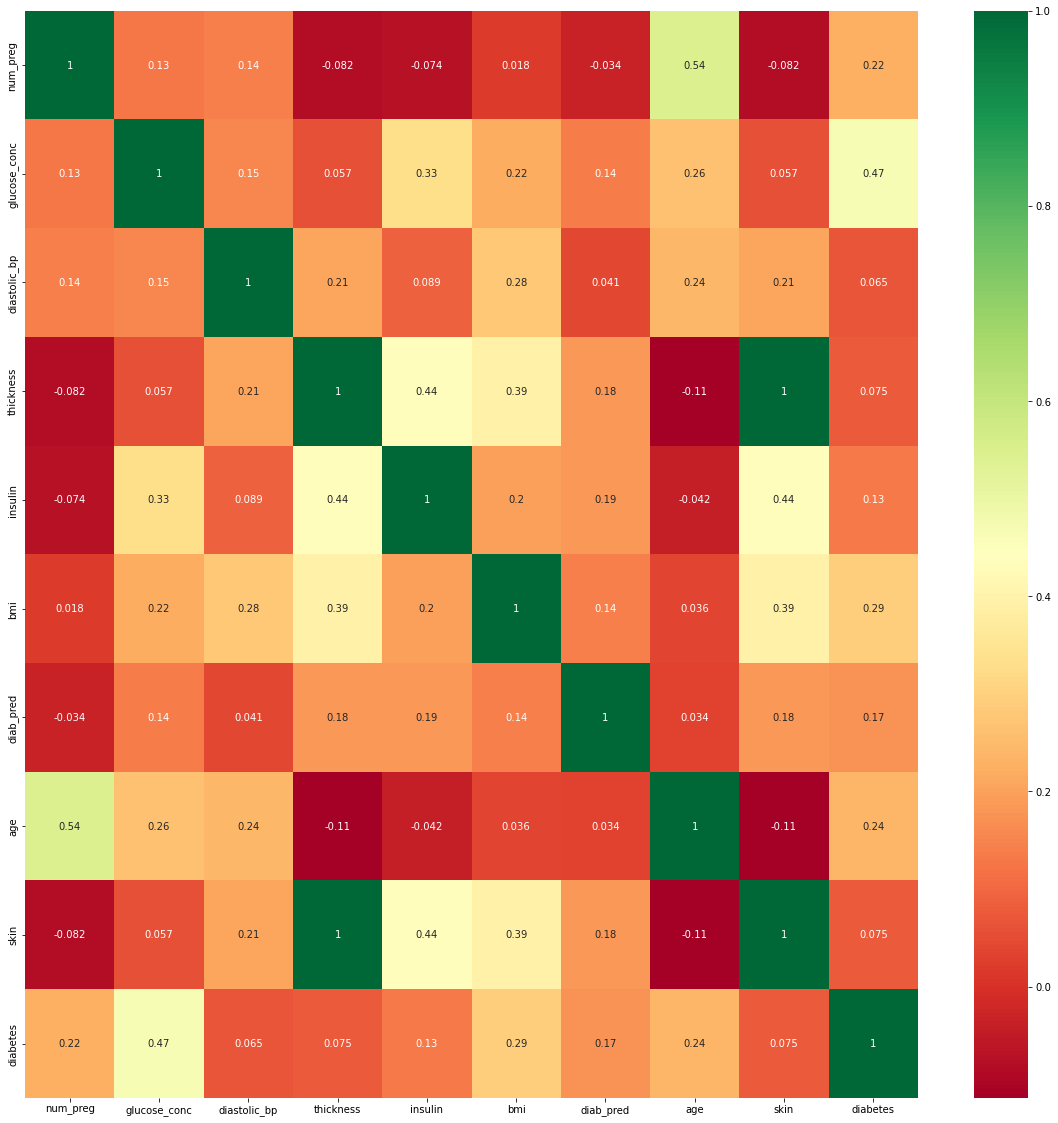

In [11]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Changing the diabetes column data from boolean to number

In [13]:
diabetes_map = {True: 1, False: 0}

In [14]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [15]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [16]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [17]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [18]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [19]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Check how many other missing(zero) values

In [20]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [23]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [24]:
## Apply Algorithm

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

C:\Users\jayde\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [25]:
predict_train_data = clf.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.732


In [37]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'class_weight': ['dict','balanced'],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [38]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [39]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'class_weight': 'dict', 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7857092941998604


In [45]:
y_pred = clf.predict(X_test)

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

<img src="confusionMatrix.PNG" width="300">

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [47]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [52]:
print(true_positive,false_positive,false_negative,true_negative)

125 19 43 44
